In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Loading the data

In [2]:
df = pd.read_csv(r"/kaggle/input/sustainable-fashion-eco-friendly-trends/sustainable_fashion_trends_2024.csv")

In [3]:
# Basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

print(df.describe())

Missing values per column:
 Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64
              Year  Carbon_Footprint_MT  Water_Usage_Liters  \
count  5000.000000          5000.000000        5.000000e+03   
mean   2016.956200           250.317550        2.517862e+06   
std       4.347466           142.802345        1.429043e+06   
min    2010.000000             1.040000        5.010618e+04   
25%    2013.000000           126.615000        1.293087e+06   
50%    2017.000000           250.650000        2.499096e

# Distribution of sustainability rating : The ratings are from A to D with A being the most sustainable

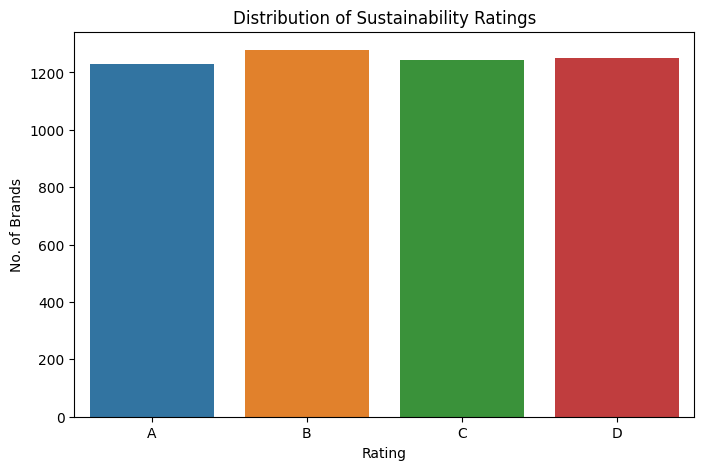

In [6]:
df['Sustainability_Rating'] = pd.Categorical(df['Sustainability_Rating'], categories=['A', 'B', 'C', 'D'], ordered=False)

plt.figure(figsize=(8,5))
sns.countplot(x=df['Sustainability_Rating'], order=['A', 'B', 'C', 'D'])
plt.title('Distribution of Sustainability Ratings')
plt.xlabel('Rating')
plt.ylabel('No. of Brands')
plt.show()

# Carbon footprint and the sustainability rating

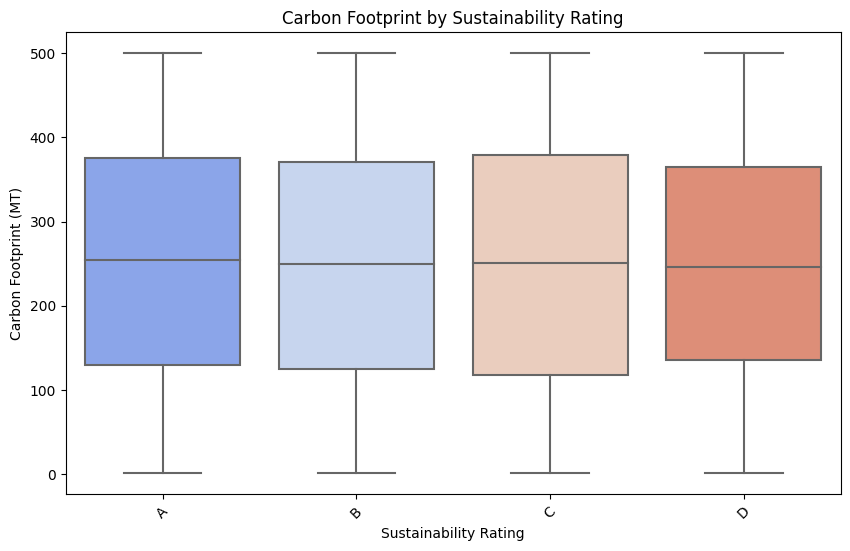

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sustainability_Rating', y='Carbon_Footprint_MT', data=df, 
            order=['A', 'B', 'C', 'D'], palette='coolwarm')
plt.title('Carbon Footprint by Sustainability Rating')
plt.xlabel('Sustainability Rating')
plt.ylabel('Carbon Footprint (MT)')
plt.xticks(rotation=45)  
plt.show()


# Most common sustainability rating per country : The ratings are scaled to numeric values with 4 being the score for highest sustainability

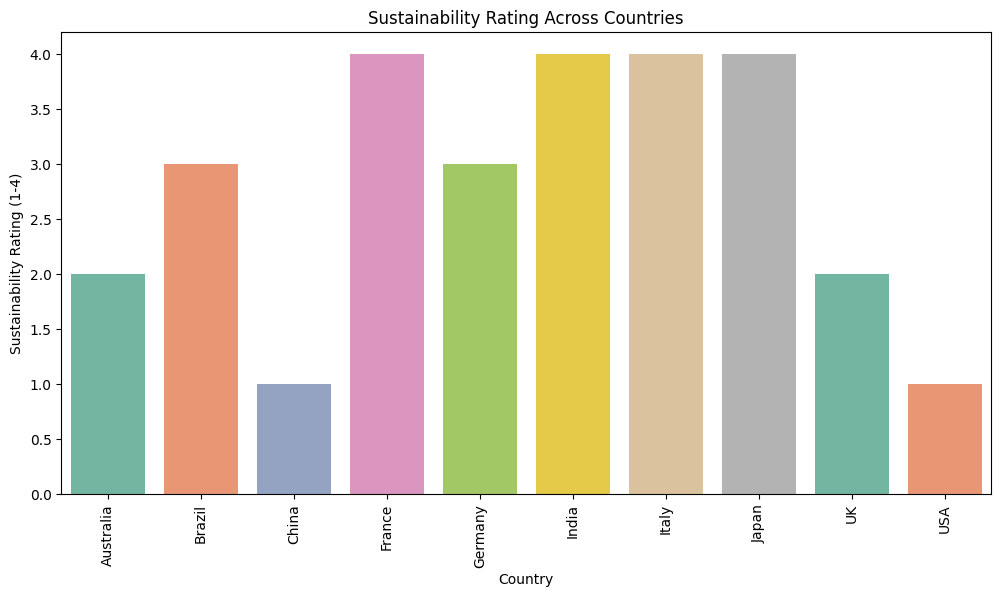

In [8]:
plt.figure(figsize=(12,6))

df_grouped = df.groupby('Country')['Sustainability_Rating'].agg(lambda x: x.mode()[0]).reset_index()


rating_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
df_grouped['Sustainability_Rating_Num'] = df_grouped['Sustainability_Rating'].map(rating_map).astype(float)  

# Bar plot
sns.barplot(x='Country', y='Sustainability_Rating_Num', data=df_grouped, order=df_grouped['Country'].unique(), palette='Set2')
plt.xticks(rotation=90)
plt.title('Sustainability Rating Across Countries')
plt.xlabel('Country')
plt.ylabel('Sustainability Rating (1-4)')
plt.show()


# Trend Analysis: Sustainability Rating Over Time

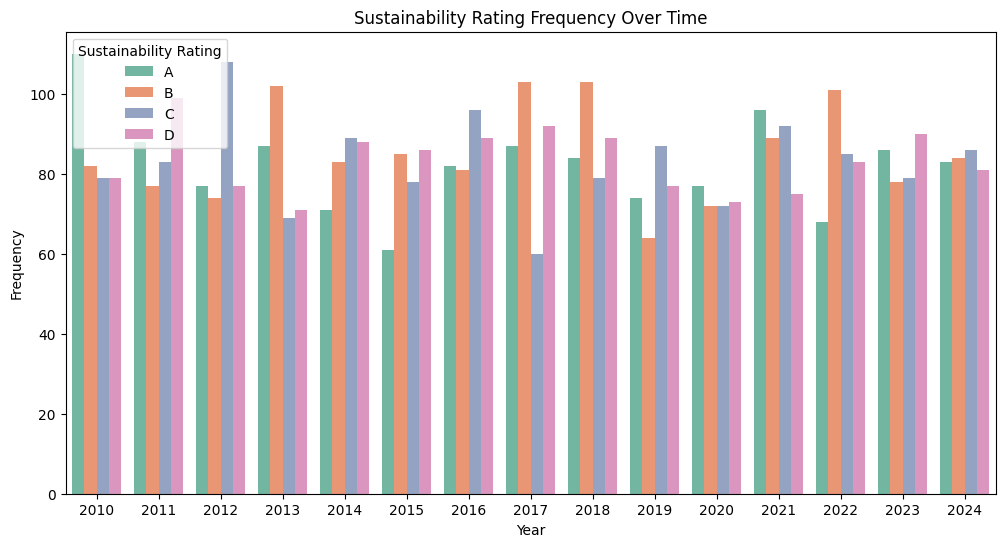

In [9]:
# Plot the frequency of sustainability ratings by year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Sustainability_Rating', palette="Set2")

# Customize the plot
plt.title('Sustainability Rating Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Sustainability Rating', loc='upper left', labels=['A', 'B', 'C', 'D'])

# Display the plot
plt.show()


# Average price for each sustainability rating

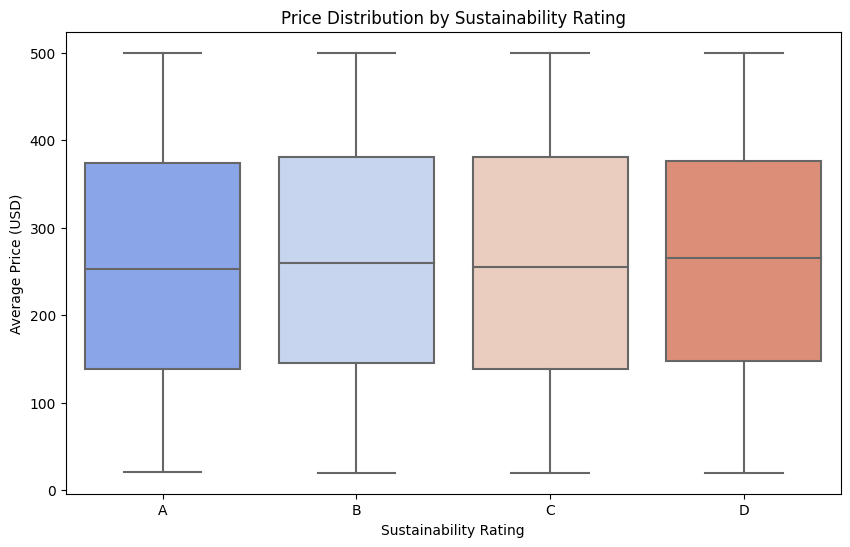

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sustainability_Rating', y='Average_Price_USD', data=df, order=['A', 'B', 'C', 'D'], palette='coolwarm')
plt.title('Price Distribution by Sustainability Rating')
plt.xlabel('Sustainability Rating')
plt.ylabel('Average Price (USD)')
plt.show()

# Do brands with higher prices take more steps toward sustainable measures : Heatmap

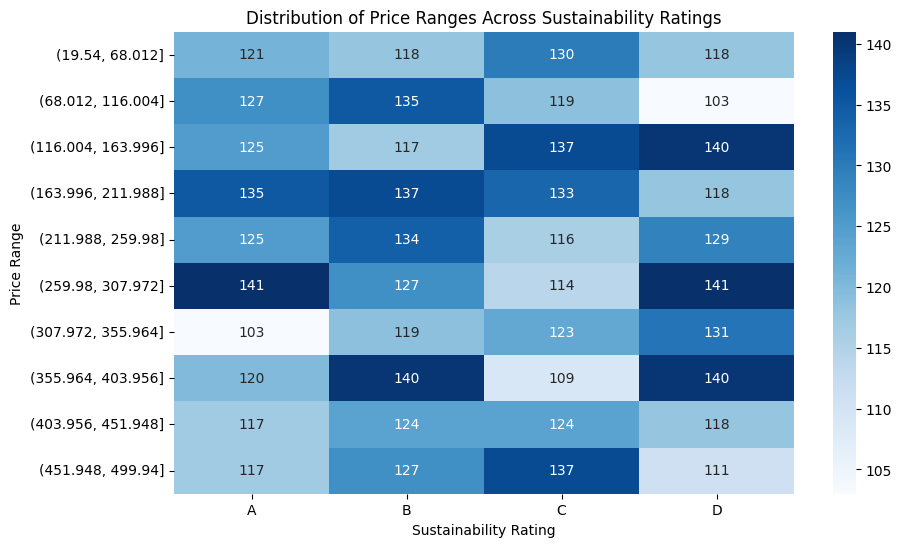

In [11]:
plt.figure(figsize=(10,6))
df['Price_Bins'] = pd.cut(df['Average_Price_USD'], bins=10)  # Divide prices into 10 bins
heatmap_data = df.pivot_table(index='Price_Bins', columns='Sustainability_Rating', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.title('Distribution of Price Ranges Across Sustainability Ratings')
plt.xlabel('Sustainability Rating')
plt.ylabel('Price Range')
plt.show()

# Market trend and sustainability rating

In [12]:
rating_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

df['Sustainability_Rating'] = df['Sustainability_Rating'].astype(str).map(rating_mapping)

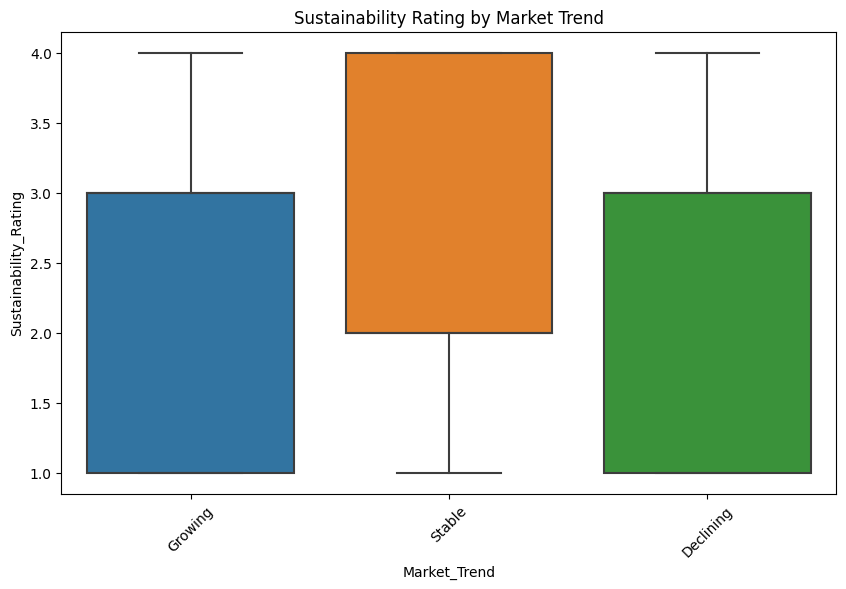

In [13]:
df['Market_Trend'] = df['Market_Trend'].astype(str).fillna('Unknown')

plt.figure(figsize=(10,6))
sns.boxplot(x='Market_Trend', y='Sustainability_Rating', data=df)
plt.title("Sustainability Rating by Market Trend")
plt.xticks(rotation=45)
plt.show()



# Does certification encourage brands to be more sustainable?

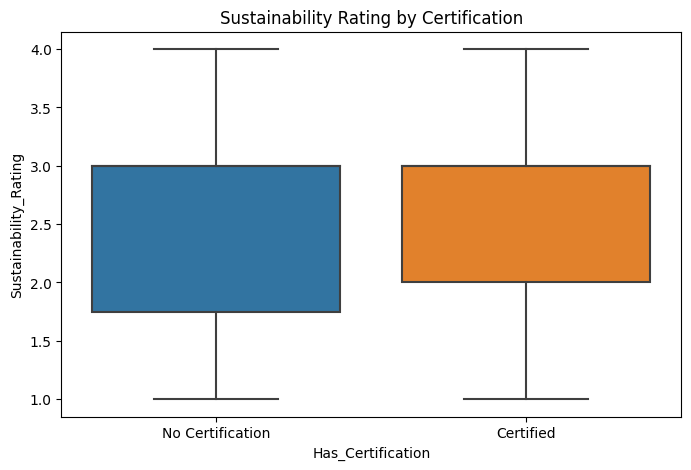

In [14]:
df['Has_Certification'] = df['Certifications'].notnull().astype(int)


plt.figure(figsize=(8,5))
sns.boxplot(x=df['Has_Certification'], y=df['Sustainability_Rating'])
plt.title("Sustainability Rating by Certification")
plt.xticks(ticks=[0,1], labels=["No Certification", "Certified"])
plt.show()

# What material type is popular for brands with higher sustainability rating (A and B)? 

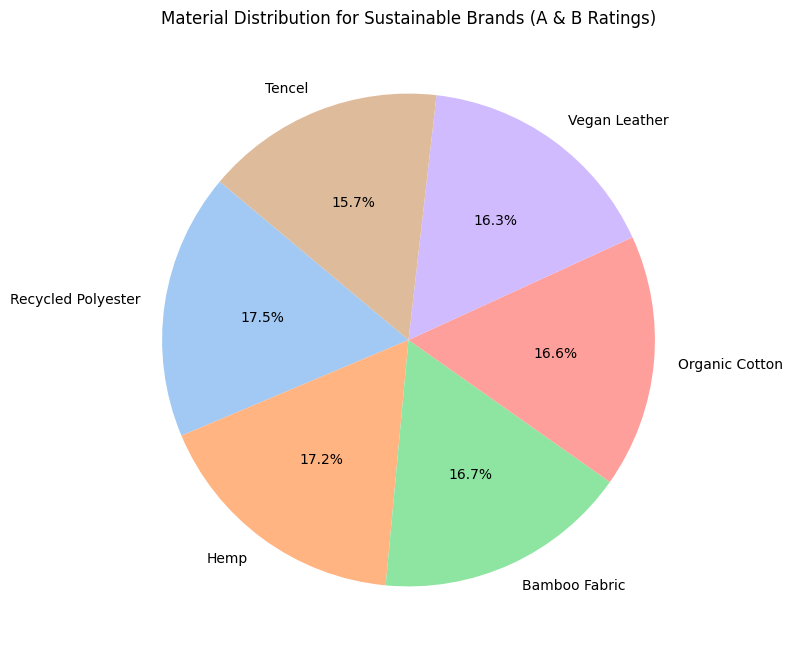

In [15]:
sustainable_brands = df[df['Sustainability_Rating'].isin([4, 3])]


material_counts = sustainable_brands['Material_Type'].value_counts()

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Material Distribution for Sustainable Brands (A & B Ratings)")
plt.show()

# Machine Learning: Predict Sustainability Rating

In [16]:
df = pd.get_dummies(df, columns=['Eco_Friendly_Manufacturing', 'Market_Trend', 'Recycling_Programs', 'Material_Type', 'Certifications'], drop_first=True)
print(df.columns)

Index(['Brand_ID', 'Brand_Name', 'Country', 'Year', 'Sustainability_Rating',
       'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG',
       'Product_Lines', 'Average_Price_USD', 'Price_Bins', 'Has_Certification',
       'Eco_Friendly_Manufacturing_Yes', 'Market_Trend_Growing',
       'Market_Trend_Stable', 'Recycling_Programs_Yes', 'Material_Type_Hemp',
       'Material_Type_Organic Cotton', 'Material_Type_Recycled Polyester',
       'Material_Type_Tencel', 'Material_Type_Vegan Leather',
       'Certifications_Fair Trade', 'Certifications_GOTS',
       'Certifications_OEKO-TEX'],
      dtype='object')


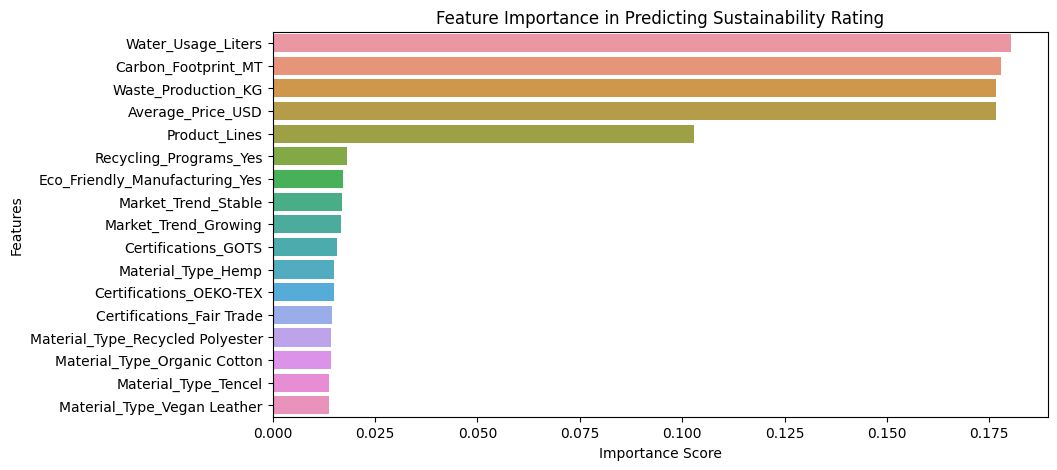

In [17]:
# Define features & target variable
features = [
    'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG',
    'Product_Lines', 'Average_Price_USD', 'Eco_Friendly_Manufacturing_Yes',
    'Market_Trend_Growing', 'Market_Trend_Stable', 'Recycling_Programs_Yes',
    'Material_Type_Hemp', 'Material_Type_Organic Cotton',
    'Material_Type_Recycled Polyester', 'Material_Type_Tencel',
    'Material_Type_Vegan Leather', 'Certifications_Fair Trade',
    'Certifications_GOTS', 'Certifications_OEKO-TEX'
]

X = df[features]  
y = df['Sustainability_Rating']  



rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importance in Predicting Sustainability Rating')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

This analysis explored the key factors affecting sustainability ratings in fashion brands. The feature importance analysis revealed that **water usage, carbon footprint, waste production, and average price** have the strongest influence on sustainability scores.  

However, the low R² values suggest that **sustainability ratings are influenced by other factors not captured in this dataset.** Future improvements could involve incorporating additional features such as **supplier data, ethical sourcing, and lifecycle assessments** to enhance predictive power.  

Despite these limitations, this project provides useful insights into sustainability trends and can serve as a foundation for further research.  